<a href="https://colab.research.google.com/github/DanielWarfield1/MLWritingAndResearch/blob/main/ImageSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Search
implimenting a simple text-to-image search and image-to-image search using [Uform](https://github.com/unum-cloud/uform#mid-fusion)

while perhaps not required, I recommend using a High RAM instance.

# Downloading Dependencies

In [5]:
!pip install uform

In [6]:
#hiding warnings from printout
import warnings
warnings.filterwarnings("ignore")

# Downloading the Model

In [7]:
import uform

model = uform.get_model('unum-cloud/uform-vl-english') # Just English

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

# Defining the Dataset

In [8]:
"""Downloading Images
I made a small directory within a github repo which has images from
the following dataset:
https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
"""

import requests
from PIL import Image
import io
from tqdm import tqdm

#listing all image files
dir = 'https://github.com/DanielWarfield1/MLWritingAndResearch/tree/main/Assets/Images/Weather'
images = []
image_infos = requests.get(dir+'?recursive=1').json()['payload']['tree']['items']

#iterating through and downloading all image files
print('downloading images...')
for iminfo in tqdm(image_infos):
    impath = 'https://raw.githubusercontent.com/DanielWarfield1/MLWritingAndResearch/main/Assets/Images/Weather/'+iminfo['name']
    r = requests.get(impath, stream=True)
    images.append(Image.open(io.BytesIO(r.content)))


downloading images...


100%|██████████| 53/53 [00:25<00:00,  2.05it/s]


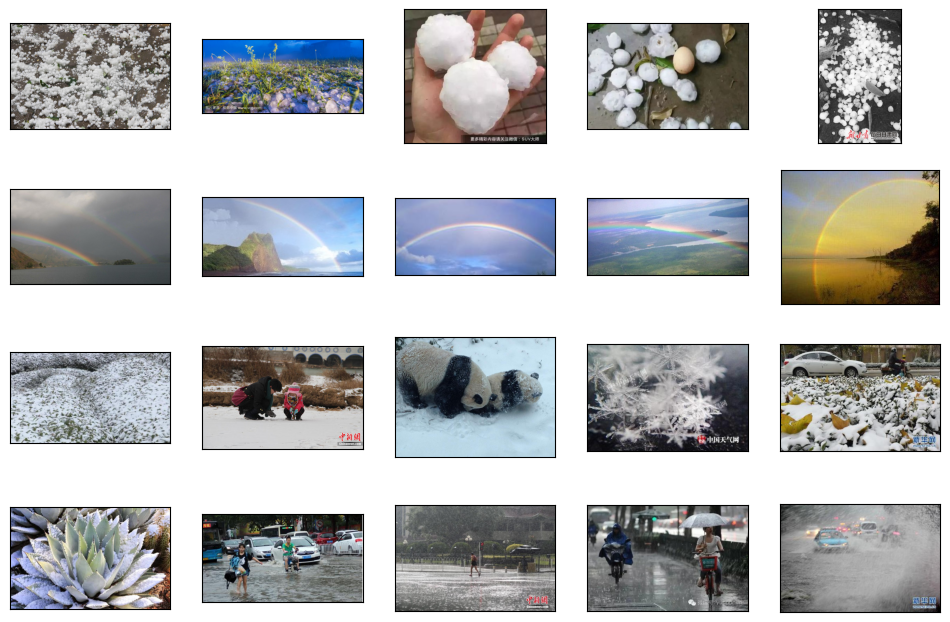

In [20]:
"""Rendering out a few images
"""
import matplotlib.pyplot as plt

_, axs = plt.subplots(4, 5, figsize=(12, 8))
axs = axs.flatten()
for img, ax in zip(images[:20], axs):
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Text to Image Search

search text: "a rainbow by the water"
encoding and calculating similarity...


100%|██████████| 53/53 [00:14<00:00,  3.70it/s]


top 5 most similar results:


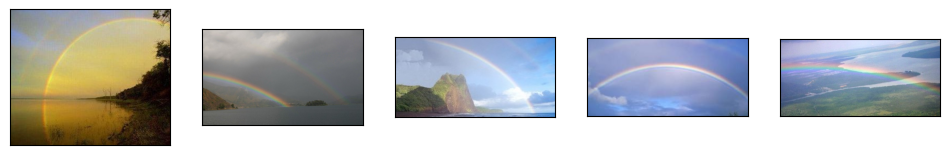

In [21]:
"""Implimenting text to image search
using the uform model to encode text and all images. Then using cosine
similarity to find images which match the specified text. Rendering out the
top 5 results
"""

import torch.nn.functional as F

#defining search phrase
text = "a rainbow by the water"
print(f'search text: "{text}"')

#embedding text
text_data = model.preprocess_text(text)
text_embedding = model.encode_text(text_data)

#sorting images by cosine similarity
sort_ls = []
print('encoding and calculating similarity...')
for image in tqdm(images):
    #encoding image
    image_data = model.preprocess_image(image)
    image_embedding = model.encode_image(image_data)

    #calculating similarity
    sim = F.cosine_similarity(image_embedding, text_embedding)

    #appending to list for later sorting
    sort_ls.append((sim, image))

#sorting by similarity
sort_ls.sort(reverse=True, key = lambda t: t[0])

print('top 5 most similar results:')
_, axs = plt.subplots(1, 5, figsize=(12, 8))
axs = axs.flatten()
for img, ax in zip([im for sim, im in sort_ls][:5], axs):
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Image to Image Search

input image:


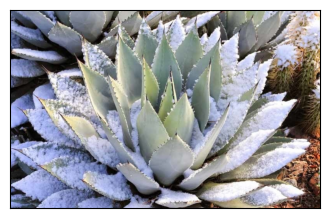

encoding and calculating similarity...


100%|██████████| 53/53 [00:12<00:00,  4.24it/s]


top 5 most similar results:


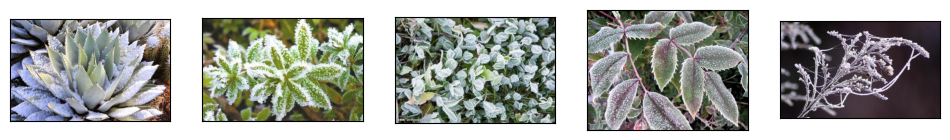

In [26]:
"""Implimenting image to image search
similar to previous approach, except all images are compared to an input image.
Rendering out the top 5 results
"""

#defining search image
input_image = images[15]

#rendering search image
print('input image:')
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.imshow(input_image)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

#embedding image
image_data = model.preprocess_image(input_image)
search_image_embedding = model.encode_image(image_data)

#sorting images by cosine similarity
sort_ls = []
print('encoding and calculating similarity...')
for image in tqdm(images):
    #encoding image
    image_data = model.preprocess_image(image)
    image_embedding = model.encode_image(image_data)

    #calculating similarity
    sim = F.cosine_similarity(image_embedding, search_image_embedding)

    #appending to list for later sorting
    sort_ls.append((sim, image))

#sorting by similarity
sort_ls.sort(reverse=True, key = lambda t: t[0])

print('top 5 most similar results:')
_, axs = plt.subplots(1, 5, figsize=(12, 8))
axs = axs.flatten()
for img, ax in zip([im for sim, im in sort_ls][:5], axs):
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
